In [6]:
import pandas as pd
import numpy as np
import pickle
import os
import datetime
import pybamm
import math
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib widget

data_DIR = "../data/ocp/"
fig_DIR = "../figures/"

In [3]:
nmc_data = pd.read_csv(data_DIR+"nmc_c150_charge_half_cell_ocp"+".csv")
graphite_data = pd.read_csv(data_DIR+"graphite_c150_discharge_half_cell_ocp"+".csv")

In [31]:
def graphite_ocp_PeymanMPM(sto):
    u_eq = (
        0.063
        + 0.8 * math.exp(-75 * (sto + 0.007))
        - 0.0120 * math.tanh((sto - 0.127) / 0.016)
        - 0.0118 * math.tanh((sto - 0.155) / 0.016)
        - 0.0035 * math.tanh((sto - 0.220) / 0.020)
        - 0.0095 * math.tanh((sto - 0.190) / 0.013)
        - 0.0145 * math.tanh((sto - 0.490) / 0.020)
        - 0.0800 * math.tanh((sto - 1.030) / 0.055)
    )

    return u_eq

def NMC_ocp_PeymanMPM(sto):
    u_eq = (
        4.3452
        - 1.6518 * sto
        + 1.6225 * (sto ** 2)
        - 2.0843 * (sto ** 3)
        + 3.5146 * (sto ** 4)
        - 2.2166 * (sto ** 5)
        - 0.5623 * 10 ** (-4) * math.exp(109.451 * sto - 100.006)
    )

    return u_eq

In [32]:
x = np.linspace(0,1,200)

In [33]:
nmc_func = np.vectorize(NMC_ocp_PeymanMPM)
nmc_peyman = nmc_func(x)
graphite_func = np.vectorize(graphite_ocp_PeymanMPM)
graphite_peyman = graphite_func(x)

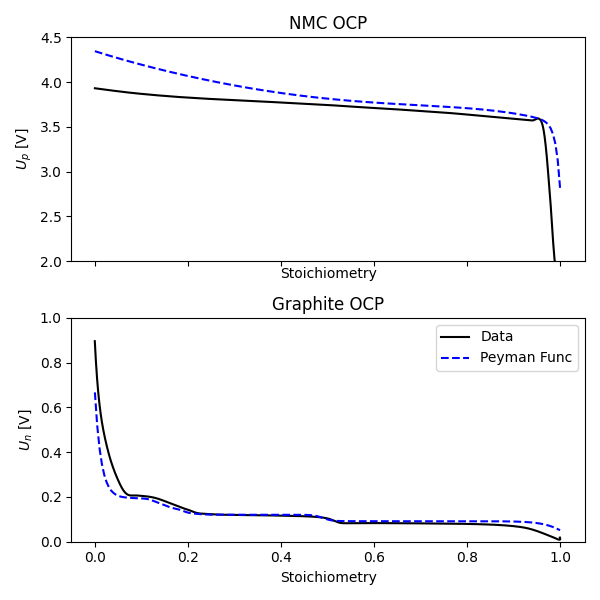

In [34]:
fig,axes = plt.subplots(2, 1, figsize=(6, 6),sharex=True)
ax1 = axes.flat[0]
ax1.plot(nmc_data["y_f"],nmc_data["Up_f"],'k')
ax1.plot(x,nmc_peyman,'b--')
ax1.set_xlabel('Stoichiometry')
ax1.set_ylabel('$U_p$ [V]')
ax1.set_title('NMC OCP')
ax1.set_ylim([2,4.5])
ax2 = axes.flat[1]
ax2.plot(graphite_data["x_f"],graphite_data["Un_f"],'k')
ax2.plot(x,graphite_peyman,'b--')
ax2.set_xlabel('Stoichiometry')
ax2.set_ylabel('$U_n$ [V]')
ax2.set_title('Graphite OCP')
ax2.legend(['Data','Peyman Func'])
ax2.set_ylim([0,1])
fig.tight_layout()

In [35]:
nmc_datac = pd.read_csv(data_DIR+'nmc622_OCP_c50_CA4'+'.csv')
graphite_datac = pd.read_csv(data_DIR+'graphite_OCP_c150_CA2'+'.csv')

In [36]:
nmc_datac.colum

,Unnamed: 0,Capacity mAh/g_Charge 1,x_Charge 1,Voltage V_Charge 1,Capacity mAh/g_Discharge 1,x_Discharge 1,Voltage V_Discharge 1
0,0,0.000000e+00,1.0,1.795843,0.000000e+00,0.000000e+00,4.169621
1,1,2.229046e-08,1.0,1.798600,2.182563e-08,5.288104e-09,4.159578
2,2,8.908526e-08,1.0,1.804390,4.367314e-08,1.058151e-08,4.150756
3,3,1.781815e-07,1.0,1.809589,6.555348e-08,1.588287e-08,4.142840
4,4,3.120227e-07,1.0,1.814866,8.740099e-08,2.117628e-08,4.135790
...,...,...,...,...,...,...,...
7709,7709,5.044822e+00,0.0,4.205068,NaN,NaN,NaN
7710,7710,5.044822e+00,0.0,4.205147,NaN,NaN,NaN
7711,7711,5.044822e+00,0.0,4.205108,NaN,NaN,NaN
7712,7712,5.044822e+00,0.0,4.205147,NaN,NaN,NaN


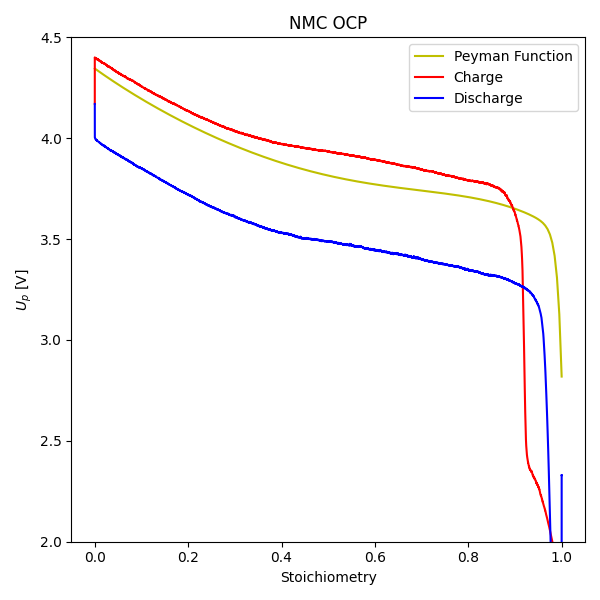

In [49]:
fig,ax1 = plt.subplots(1, 1, figsize=(6, 6),sharex=True)
ax1.plot(x,nmc_peyman,'y')
ax1.plot(nmc_datac["x_Charge 1"],nmc_datac["Voltage V_Charge 1"],'r')
ax1.plot(nmc_datac["x_Discharge 1"],nmc_datac["Voltage V_Discharge 1"],'b')
ax1.set_xlabel('Stoichiometry')
ax1.set_ylabel('$U_p$ [V]')
ax1.set_title('NMC OCP')
ax1.set_ylim([2,4.5])
ax1.legend(['Peyman Function','Charge','Discharge'])
ax2.set_ylim([0,1])
fig.tight_layout()
fig.savefig('NMC_ocp.png')

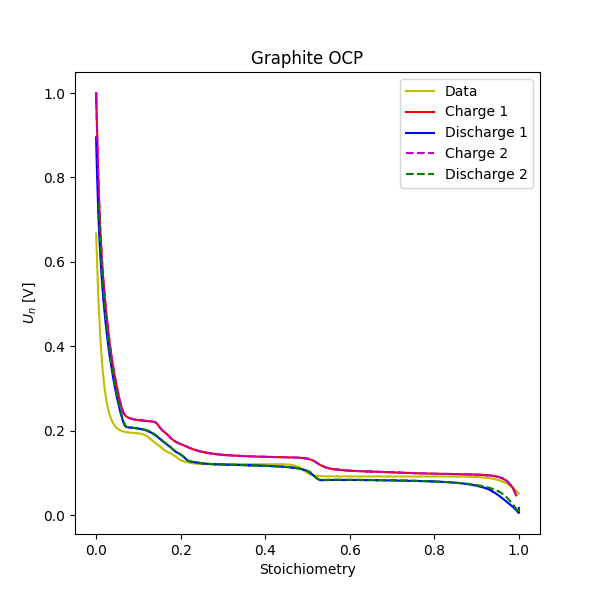

In [50]:
fig,ax2 = plt.subplots(1, 1, figsize=(6, 6),sharex=True)
ax2.plot(x,graphite_peyman,'y')
ax2.plot(graphite_datac["x_Charge 1"],graphite_datac["Voltage V_Charge 1"],'r')
ax2.plot(graphite_datac["x_Discharge 1"],graphite_datac["Voltage V_Discharge 1"],'b')
ax2.plot(graphite_datac["x_Charge 2"],graphite_datac["Voltage V_Charge 2"],'m--')
ax2.plot(graphite_datac["x_Discharge 2"],graphite_datac["Voltage V_Discharge 2"],'g--')
ax2.set_xlabel('Stoichiometry')
ax2.set_ylabel('$U_n$ [V]')
ax2.set_title('Graphite OCP')
ax2.legend(['Data','Charge 1','Discharge 1','Charge 2','Discharge 2'])
fig.savefig('graphite_ocp.png')